In [1]:
import env
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import wrangle

In [3]:
df=wrangle.wrangle()

Reading data from SQL server....
(This usually takes a while...)
Data read.
Adding number of programs completed...
Converting datatypes and reindexing on datetime....
Adding columns for days after graduation and program name.
Data is acquired, prepared, and wrangling complete.


In [4]:
df.to_csv('initial_pull.csv')

In [3]:
df.head()

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [11]:
df[df.program_id==1].cohort_name.value_counts()

Lassen        9587
Arches        8890
Olympic       4954
Kings         2845
Hampton       1712
Quincy        1237
Glacier        598
Joshua         302
Ike            253
Badlands        93
Franklin        72
Denali           4
Everglades       1
Name: cohort_name, dtype: int64

In [12]:
df[df.program_id==2].cohort_name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Wrangell      25586
Andromeda     25359
Kalypso       23691
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Sequoia        7444
Neptune        7276
Pinnacles      2158
Oberon         1672
Niagara         755
Mammoth         691
Name: cohort_name, dtype: int64

In [17]:
df[df.program_id==3].cohort_name.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: cohort_name, dtype: int64

### Lets look at individual student access per DS Cohort

- Go ahead and make a dataframe for each

In [24]:
df.head()

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [25]:
df[df.cohort_name ==' Bayes']

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,


In [26]:
bayes = df[df.cohort_name =='Bayes']
curie = df[df.cohort_name =='Curie']
darden = df[df.cohort_name =='Darden']
easley = df[df.cohort_name =='Easley']
florence = df[df.cohort_name =='Florence']


In [33]:
print(bayes.shape)
print(curie.shape)
print(darden.shape)
print(easley.shape)
print(florence.shape)

(26538, 14)
(21582, 14)
(32015, 14)
(14715, 14)
(8562, 14)


In [34]:
# Get cohort counts
print(len(bayes.user_id.unique()))
print(len(curie.user_id.unique()))
print(len(darden.user_id.unique()))
print(len(easley.user_id.unique()))
print(len(florence.user_id.unique()))

23
21
29
17
21


### Lets look at Bayes traffic by user

In [35]:
df.head()

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [40]:
bayes.head()

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,
2019-08-20 09:39:58,2019-08-20,09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 09:39:58,-163 days,data_science
2019-08-20 10:50:06,2019-08-20,10:50:06,1-fundamentals/1.1-intro-to-data-science,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 10:50:06,2019-08-20,10:50:06,1-fundamentals/modern-data-scientist.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 10:50:06,2019-08-20,10:50:06,1-fundamentals/AI-ML-DL-timeline.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 14:39:07,2019-08-20,14:39:07,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 14:39:07,-163 days,data_science


In [65]:
bayes['user_id']=bayes['user_id'].astype(object)

In [66]:
bayes.dtypes

date                  datetime64[ns]
time                          object
endpoint                      object
user_id                       object
cohort_id_x                  float64
source_ip                     object
cohort_name                   object
cohort_start          datetime64[ns]
cohort_end            datetime64[ns]
program_id                     int64
number_of_classes              int64
date_time             datetime64[ns]
days_after_grad      timedelta64[ns]
program                       object
dtype: object

<AxesSubplot:xlabel='date_time'>

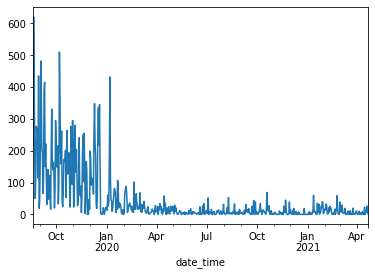

In [67]:
bayes['endpoint'].resample('d').count().plot()


In [68]:
bayes.dtypes

date                  datetime64[ns]
time                          object
endpoint                      object
user_id                       object
cohort_id_x                  float64
source_ip                     object
cohort_name                   object
cohort_start          datetime64[ns]
cohort_end            datetime64[ns]
program_id                     int64
number_of_classes              int64
date_time             datetime64[ns]
days_after_grad      timedelta64[ns]
program                       object
dtype: object

In [69]:
bayes_students =pd.DataFrame(bayes.groupby(by='user_id').endpoint.resample('d').count())

In [70]:
bayes_students

endpoint
user_id date_time           
358     2019-08-20         4
        2019-08-21         3
        2019-08-22         9
        2019-08-23         1
        2019-08-24         0
...                      ...
650     2021-02-08         0
        2021-02-09         0
        2021-02-10         0
        2021-02-11         0
        2021-02-12         5

[9552 rows x 1 columns]

In [78]:
bayes_students = bayes_students.reset_index()

In [83]:
bayes_students.dtypes

user_id              object
date_time    datetime64[ns]
endpoint              int64
dtype: object

In [82]:
bayes_students['user_id'] = bayes_students['user_id'].astype(object)

Instead of doing a for loop and plotting by user ID, I want to plot this in Seaborn and hue by user id

In [74]:
bayes_students.dtypes

endpoint    int64
dtype: object

In [61]:
bayes_students.index.value_count()

AttributeError: 'MultiIndex' object has no attribute 'value_count'

In [75]:
bayes.user_id.value_counts()

485    3268
475    2136
476    2075
479    2007
478    1659
482    1391
471    1380
469    1310
473    1254
466    1200
481    1108
358    1070
480    1047
484    1047
483     872
472     835
468     778
474     585
467     554
470     468
477     459
650      18
487      17
Name: user_id, dtype: int64

In [84]:
bayes_students.head()

,user_id,date_time,endpoint
0,358,2019-08-20,4
1,358,2019-08-21,3
2,358,2019-08-22,9
3,358,2019-08-23,1
4,358,2019-08-24,0


In [86]:
bayes_students.dtypes

user_id              object
date_time    datetime64[ns]
endpoint              int64
dtype: object

<AxesSubplot:xlabel='date_time', ylabel='endpoint'>

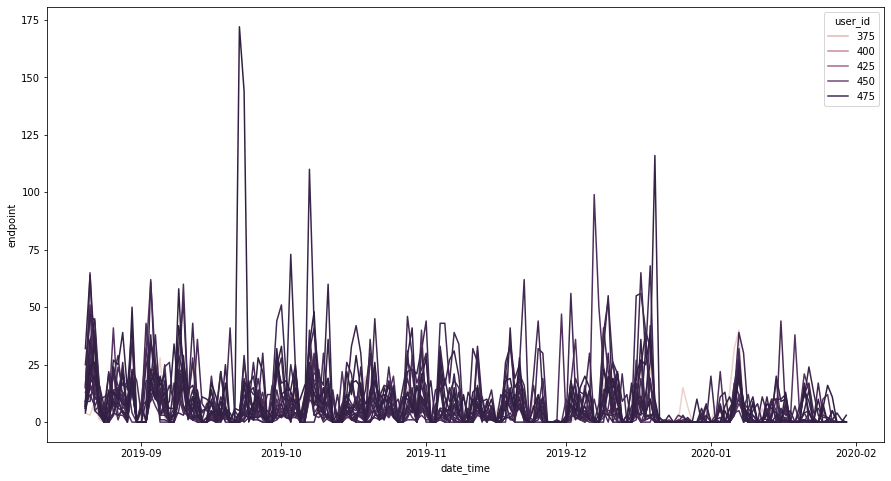

In [88]:
plt.figure(figsize=(15,8))
#sns.tsplot(data=bayes_students['endpoint'], time = bayes_students['date_time'])
sns.lineplot(x='date_time', y='endpoint', hue='user_id', data = bayes_students[bayes_students.date_time < '2020-01-31'])
#limit to dates during cohort
#plt.set_xlim(2019-08-19, 2020-01-30)


In [94]:
len(bayes.user_id.unique())

23

In [92]:
bayes_students[bayes_students.date_time < '2020-01-31']

,user_id,date_time,endpoint
0,358,2019-08-20,4
1,358,2019-08-21,3
2,358,2019-08-22,9
3,358,2019-08-23,1
4,358,2019-08-24,0
5,358,2019-08-25,4
6,358,2019-08-26,3
7,358,2019-08-27,3
8,358,2019-08-28,5
9,358,2019-08-29,1


In [91]:
pd. set_option('display.max_rows', None) # or 1000.


In [55]:
type(bayes_students)

pandas.core.series.Series

In [ ]:
fig, ax =plt.subplots(figsize=(12,6))

x = bayes_students.date_time
y = bayes['endpoint'].resample('d').count()

ax.plot(y)

plt.show()

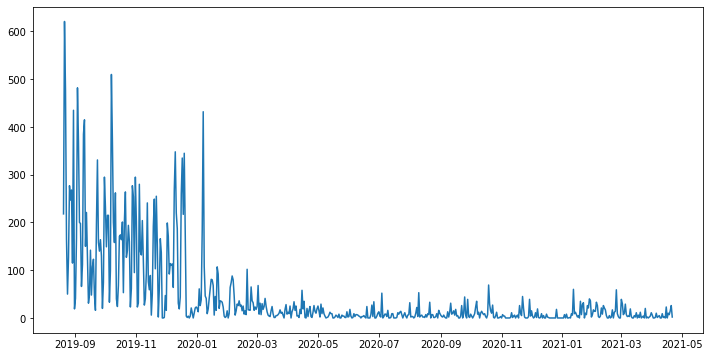

In [44]:
fig, ax =plt.subplots(figsize=(12,6))

x = bayes.date
y = bayes['endpoint'].resample('d').count()

ax.plot(y)

plt.show()

In [ ]:

ax.set_xlim(data['Dates'].min(), data['Dates'].max())


In [38]:
bayes_pages

date_time
2019-08-20    218
2019-08-21    621
2019-08-22    476
2019-08-23    165
2019-08-24     50
             ... 
2021-04-17     10
2021-04-18      7
2021-04-19     15
2021-04-20     26
2021-04-21      2
Freq: D, Name: endpoint, Length: 611, dtype: int64

In [ ]:
sns.lineplot(x='date' y='endpoint')

In [14]:
df[df.program_id==4].cohort_name.value_counts()

Apollo    5
Name: cohort_name, dtype: int64

In [15]:
df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [16]:
df.endpoint.value_counts()

/                                                 45854
javascript-i                                      18203
toc                                               17591
search/search_index.json                          17534
java-iii                                          13166
                                                  ...  
5-stats                                               1
java-ii/file-op                                       1
html-css/img/favicon.ico                              1
content/examples/constructors-destructors.html        1
where                                                 1
Name: endpoint, Length: 2224, dtype: int64